# LAB 13 MLP through Forward Pass 

In this lab we will try to make a multi layer perceptron and train on a given dataset. In the end we will see the loss function value after training each epoch. 

## What is MLP
An MLP is known as a deep artificial neural network. It is a collection of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a choice or prediction about the input, and in between, an random no. of hidden layers (True computational engine of the MLP)

Multilayer perceptrons train on a set of pairs of I/O and learn to model the connection between those inputs and outputs. Training requires adjusting the framework , or the weights and biases, in order to decrease the error. Backpropagation is used to make those given weight and bias adaptation relative to the error, and the error itself can be used to measure in a variety of ways , including by root mean squared error



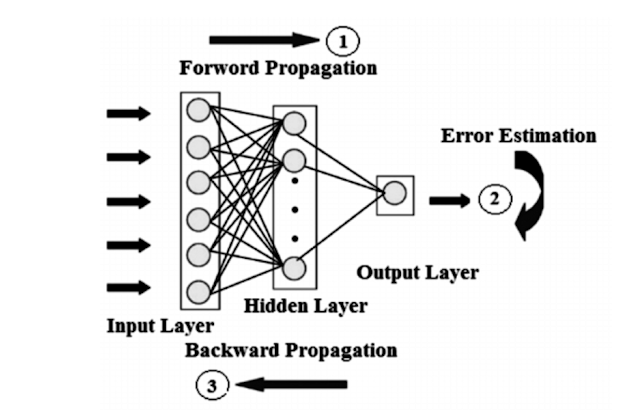

In the above diagram , the forward pass, the signal flow movement is from the input layer through the hidden layers and then to the output layer, and the conclusion of the output layer is measured against the truth labels.

And in the backward pass, by using backpropagation and the chain rule of calculus, biased derivatives of the error function concerning the dissimilar weights and biases are back-propagated through the Multilayer perceptron.

# Implementation & Task
### Following is the implementation of MLP using PyTorch
### You will need to train the model on a given dataset and display the loss function value after training each batch.

### Imports
1. Os is used for file input/output functionality
2. torch, which imports PyTorch. It is used to import nn, (define a neural netwrork module) . 
3. DataLoader is used for data on which we will perform 
4. transforms is used that allows us to perform transformations on the data prior to feeding it to the MLP.

In [6]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

### Step 1: MLP Neural Netwrok Class

Module class It has two definitions: __init__, or the constructor, and forward, which implements the forward pass.

1. In the constructor, we first invoke the superclass initialization
2. Define the layers of our neural network. We stack all layers (three densely-connected layers with Linear and ReLU activation functions using nn.Sequential. We also add nn.Flatten() at the start. Flatten converts the 3D image representations (width, height and channels) into 1D format, which is necessary for Linear layers. Note that with image data it is often best to use Convolutional Neural Networks. This is out of scope for this tutorial and will be covered in another one.

3. The forward pass allows us to react to input data - for example, during the training process. In our case, it does nothing but feeding the data through the neural network layers, and returning the output.




In [16]:
class MLP(nn.Module):
    '''
      Multilayer Perceptron.
    '''

    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.ReLU()
        )
        # 1. Initialize the constructor using super
        # 2. There will be three stacked layers , assign self.layers == nn.Sequential
        # 3. before passing declaring the layers , you have to flatten the 3d dataset into 1d, using nn.flatten
        # 4. the size of input sample should be 32*32*3 and output sample should be 64 for first Linear layer
        # 5. the size of input sample should be 64 and output sample should be 32 for first Linear layer
        # 6. the size of input sample should be 32 and output sample should be 10 for first Linear layer

        pass

        '''
    Helping code
    
    '''

        '''
    # Using Sequential to create a small model. When `model` is run,
    # input will first be passed to `Linear(2 , 3)`. The output of
    # `Linear(2,3)` will be used as the input to the first
    # `ReLU`; the output of the first `ReLU` will become the input
    # for `Linear(4,3)`. Finally, the output of
    # `Linear(4,3)` will be used as input to the second `ReLU`
    
    model = nn.Sequential(
          nn.Linear(2 , 3),
          nn.ReLU(),
          nn.Linear(4,3)
          nn.ReLU
          
        )
        
    nn.Linear(in_features, out_features)
    in_features – size of each input sample
    out_features – size of each output sample
        
    '''

    def forward(self, x):
        # Forward pass 
        # 1. Return the layers
      return self.layers(x)


### Step 2 Runtime Code

We will transform data , initalize MLP , loss fun and optimizer.In the end we will define the training loop in the runtime code

In [24]:
if __name__ == '__main__':
  
  # 1. Set fixed random number seed
   # this helps to initalize a random number from the same staring value.This lessesn the ambiguit in findings
   # use torch.manualseed using 42 as the starting value
  torch.manual_seed(42)
  # 2. Transform dataset
  dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  # 3. Initalize MLP 
  mlp = MLP()
  # 4. For the loss fun , use the CrossEntropyLoss func of nn module
  loss_function = nn.CrossEntropyLoss()
  # 5. For the optimizer , we use Adamoptimizer fun, 
  optimizer = torch.optim.Adam( mlp.parameters(), lr=1e-4)
 # 6. The training loop starts here
  #6a.# Run the loop for traing it should range for 5 epohs
  for i in range(0, 5):
      # Print epoch
    print("iteration:", i)
      # Set the current loss value to 0.00
    current_loss = 0.0
      # Iterate over trainloader using enumerate as you will need i for printing the stats
    for y, data in enumerate(trainloader):
        # Get inputs and targets , they wil be = to data
      input, targets = data
        # Zero the gradients using the optimizer (there is a fun for this zero_grad())
      optimizer.zero_grad()
        # Perform forward pass (output will be = to input passed through mlp)
      outputs = mlp(input)
        # Compute loss(loss = fun(1st , 2nd) ,, the first param = to input and the 2nd will be = to output)
      loss = loss_function(outputs, targets)
        # Perform backward pass (loss.backward())
      loss.backward()
        # Perform optimization (optimizer.step())
      optimizer.step()  
        # Print statistics
      current_loss += loss.item()
      if y % 500 == 499:
        print('Loss after mini-batch %5d: %.3f' %
              (y + 1, current_loss / 500))
        current_loss = 0.0
        
     # Process is complete.

Files already downloaded and verified
iteration: 0
Loss after mini-batch   500: 2.287
Loss after mini-batch  1000: 2.251
Loss after mini-batch  1500: 2.226
Loss after mini-batch  2000: 2.215
Loss after mini-batch  2500: 2.188
Loss after mini-batch  3000: 2.170
Loss after mini-batch  3500: 2.148
Loss after mini-batch  4000: 2.133
Loss after mini-batch  4500: 2.126
Loss after mini-batch  5000: 2.106
iteration: 1
Loss after mini-batch   500: 2.117
Loss after mini-batch  1000: 2.108
Loss after mini-batch  1500: 2.088
Loss after mini-batch  2000: 2.083
Loss after mini-batch  2500: 2.103
Loss after mini-batch  3000: 2.109
Loss after mini-batch  3500: 2.088
Loss after mini-batch  4000: 2.089
Loss after mini-batch  4500: 2.079
Loss after mini-batch  5000: 2.081
iteration: 2
Loss after mini-batch   500: 2.067
Loss after mini-batch  1000: 2.075
Loss after mini-batch  1500: 2.067
Loss after mini-batch  2000: 2.081
Loss after mini-batch  2500: 2.065
Loss after mini-batch  3000: 2.052
Loss after mi